<a href="https://colab.research.google.com/github/shrad1997/Random_Forest/blob/main/Random_forest_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("/content/Company_Data (1).csv")

In [ ]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [ ]:
# CONVERTING CONTINUOS VAR INTO CATEGORICAL VAR
Sales_category= pd.cut(df.Sales,bins=[0,7.49,16.27],labels=['Low','High']) ##Here 0 means low sale and 1 means high sale


In [ ]:
df.insert(11,"Sales_category",Sales_category)

In [ ]:
from sklearn import  preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['Sales_category']= label_encoder.fit_transform(df['Sales_category'])

In [ ]:
df.Sales_category.unique()

array([0, 1, 2])

In [ ]:
df=df.drop("Sales",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CompPrice       400 non-null    int64
 1   Income          400 non-null    int64
 2   Advertising     400 non-null    int64
 3   Population      400 non-null    int64
 4   Price           400 non-null    int64
 5   ShelveLoc       400 non-null    int64
 6   Age             400 non-null    int64
 7   Education       400 non-null    int64
 8   Urban           400 non-null    int64
 9   US              400 non-null    int64
 10  Sales_category  400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [ ]:
df.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [ ]:
 #Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:,0:10]
Y = df.iloc[:,10]
num_trees = 200
max_features = 5
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8125


In [ ]:
model.fit(X,Y)

RandomForestClassifier(max_features=5, n_estimators=200)

In [ ]:
y_pred=model.predict(X)

In [ ]:
md=pd.Series(y_pred)
df['Predicted_Sales']=md # creating a  new column and assigning it to new column 
df.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category,Predicted_Sales
0,138,73,11,276,120,0,42,17,1,1,0,0
1,111,48,16,260,83,1,65,10,1,1,0,0
2,113,35,10,269,80,2,59,12,1,1,0,0
3,117,100,4,466,97,2,55,14,1,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1,1


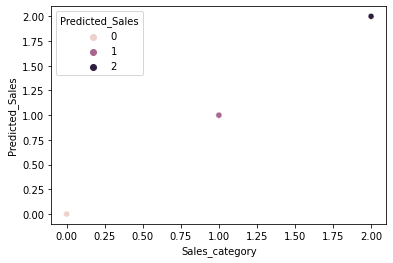

In [ ]:
import seaborn as sns
sns.scatterplot(data=df,x="Sales_category",y="Predicted_Sales",hue="Predicted_Sales")